# Deep Azure - Final Project using Azure Computer Vision API

#### By Umair Khalid - umair.khalid@mckesson.com - Feb 10, 2017

Goal of this project is to understand the capablities of the Azure Computer Vision API and how it can be applied to common healthcare technology challenges. We will be using the out-of-the-box capablities offered by Azure today. 

### Use Case # 1 - Object Recognition - Pill count and identification using Azure Computer Vision API

Patient often have trouble keeping up with how many doses they have remaining and when they are expected to run out. With the aid of smartphone camera, and Azure’s Computer Vision API, we can easy help identify how many pill they have remaining in the container and based on their daily dosage, automatically place an order with their pharmacy.

### - Test Case # 1
##### Shows a variety of pill with different shapes and sizes  

![Test Image](https://lh3.ggpht.com/uYHglimIijXcGGwmcd-VtOgdmU4utp-9gOjJhQ8G0aKIOSxIBqo0ifrDv6qHEU4gd76I=w300)

Assertions: 
1. Computer Vision API should identify 7 pills. 
2. Pills should be grouped into 5 different categories.
3. Each category should have trails identified such as color, shape, dimensions


In [11]:
import requests
import pprint

subscription_key = "e2c78a91f24148658352eb0a10c3e383"
assert subscription_key

vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/"
vision_analyze_url = vision_base_url + "describe"

image_url = "https://lh3.ggpht.com/uYHglimIijXcGGwmcd-VtOgdmU4utp-9gOjJhQ8G0aKIOSxIBqo0ifrDv6qHEU4gd76I=w300"

headers = {'Ocp-Apim-Subscription-Key' : subscription_key }
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

pprint.pprint(analysis)


A close up of a white table
{'description': {'captions': [{'confidence': 0.2947399865744497,
                               'text': 'a close up of a white table'}],
                 'tags': ['indoor',
                          'table',
                          'sitting',
                          'small',
                          'top',
                          'white',
                          'counter',
                          'remote',
                          'brush',
                          'sink']},
 'metadata': {'format': 'Png', 'height': 300, 'width': 300},
 'requestId': '710388db-3e91-4d0c-a2c9-708269c2c44e'}


####  Test Case # 1 Result: FAILED ALL ASSERTIONS

The API failed to recognize the pill at all, and identified that there is a white table. Non of the tags identified that Pills exist anywhere on the table.

<hr>

### - Test Case # 2 
##### Shows same type of pill 

![Test Image](http://2tlwk93pj6ddba08a1egtidy.wpengine.netdna-cdn.com/wp-content/uploads/2016/05/pills-3.jpg)

Assertions: 
1. Computer Vision API should identify 9 pills.

In [12]:
image_url = "http://2tlwk93pj6ddba08a1egtidy.wpengine.netdna-cdn.com/wp-content/uploads/2016/05/pills-3.jpg"

headers = {'Ocp-Apim-Subscription-Key' : subscription_key }
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

pprint.pprint(analysis)

A close up of a cutting board
{'description': {'captions': [{'confidence': 0.4720577622103957,
                               'text': 'a close up of a cutting board'}],
                 'tags': ['indoor',
                          'surface',
                          'board',
                          'table',
                          'sitting',
                          'red',
                          'top',
                          'cutting',
                          'topped',
                          'small',
                          'laying',
                          'counter',
                          'white',
                          'food',
                          'close',
                          'fruit',
                          'remote',
                          'apple',
                          'bear',
                          'plate',
                          'knife',
                          'bed',
                          'bottle',
                     

####  Test Case # 2 Result: FAILED ALL ASSERTIONS

The API failed to recognize the pill at all, and identified that there is a white cutting board. Non of the tags identified that Pills exist anywhere on the table.

<hr>

### - Test Case # 3
##### Shows a variety of pill with different shapes and sizes in a person's hand.  

![Test Image](https://www.healthline.com/hlcmsresource/images/AN_images/AN19-Pills-In-Hand-732x549-thumb.jpg)

Assertions: 
1. Computer Vision API should identify 6 pills. 
2. Pills should be grouped into 6 different categories.
3. Each category should have trails identified such as color, shape, dimensions

In [22]:
image_url = "https://www.healthline.com/hlcmsresource/images/AN_images/AN19-Pills-In-Hand-732x549-thumb.jpg"

headers = {'Ocp-Apim-Subscription-Key' : subscription_key }
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

pprint.pprint(analysis)

A close up of a hand
{'description': {'captions': [{'confidence': 0.9147471576690658,
                               'text': 'a close up of a hand'}],
                 'tags': ['person',
                          'holding',
                          'hand',
                          'indoor',
                          'small',
                          'piece',
                          'food',
                          'made',
                          'someone',
                          'close',
                          'green',
                          'white']},
 'metadata': {'format': 'Jpeg', 'height': 549, 'width': 732},
 'requestId': '7e1746ad-c976-40e0-9131-0867f4b1c796'}


####  Test Case # 3 Result: FAILED ALL ASSERTIONS

The API failed to recognize the pill at all, and identified that there hand. 
None of the tags identified that Pills exist in the person's hand.

<hr>

### Use Case # 2 - Optical Character Recognition - Read handwitten prescriptions

One of the biggest challenges in healthcare is the use of handwritten prescriptions and faxing them in. Read handwritten prescriptions using Azure Computer Vision API OCR and convert them to digital format so they can be used for placing order into the pharmacy.

#### Test Case 1 - Prescription with printed and handwirtten text.

![faxed](http://rx-wiki.org/images/2/28/Lipitorscript.png)

Assertion: Correctly identify the drug and prescrtion. (example: Lipitor 20mg)

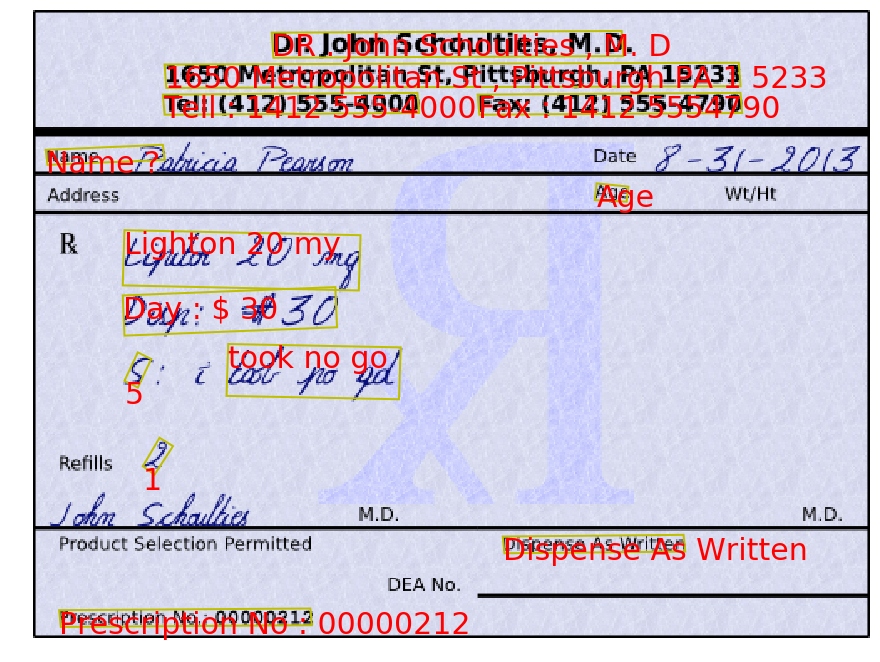

In [35]:
image_url = "http://rx-wiki.org/images/2/28/Lipitorscript.png"

text_recognition_url =  vision_base_url + "recognizeText"

headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'handwriting': 'true'}
data     = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

operation_url = response.headers["Operation-Location"]

import time

analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis       = response_final.json()
    time.sleep(1)
    
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]

%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

plt.figure(figsize=(15,15))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True,fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=30, va="top", color="red", )
_ = plt.axis("off")


####  Test Case # 1 Result: Hand writing recognizion mostly failed

The API failed to recognize the handwritten text, but identified the printed text correctly. 

<hr>

###  Test Case 2
##### Prescription with printed and handwirtten text.

![faxed](http://4.bp.blogspot.com/-_kBJT0h6Spg/UdbTldpNbdI/AAAAAAAAAWA/18wS5P6bDY4/s1600/vio-2.jpg)

Assertion: Correctly identify the drug and prescrtion. (example: Rigolibt 20mg)

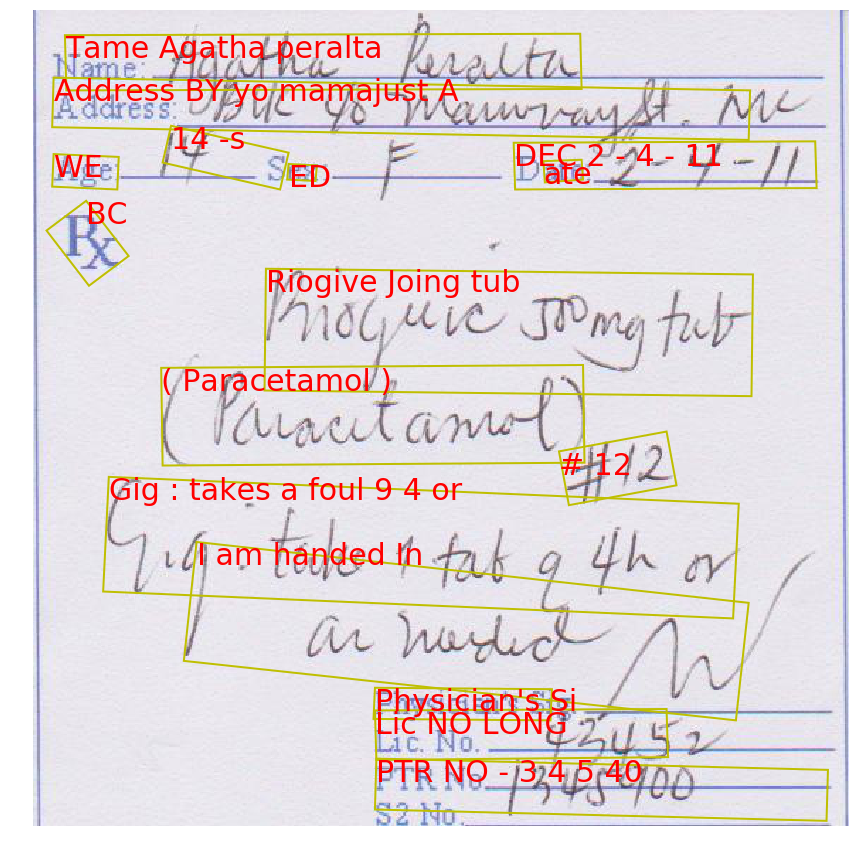

In [37]:
image_url = "http://4.bp.blogspot.com/-_kBJT0h6Spg/UdbTldpNbdI/AAAAAAAAAWA/18wS5P6bDY4/s1600/vio-2.jpg"

text_recognition_url =  vision_base_url + "recognizeText"

headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'handwriting': 'true'}
data     = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

operation_url = response.headers["Operation-Location"]

import time

analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis       = response_final.json()
    time.sleep(1)
    
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]

%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

plt.figure(figsize=(15,15))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True,fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=30, va="top", color="red", )
_ = plt.axis("off")


#### Test Case # 2 Result: Hand writing recognizion partial success

The API partially recognized the handwritten text, although the result would not be usable in the real-world use case.

<hr>

## Conculusion

The Azure Vision API is not ready for real-world health-care application. I believe it can be used to compliment custom built machine learning models, but it can not accuratly describe pills or read an doctor's handwriting. 
